# Machine Learning Assignment - Humidity Prediction using Weather Dataset

## Introduction

This is a dataset for a larger project and the idea is to analyze and compare real historical weather with weather folklore. Predict the humidity and display the following results MSE,RMSE

## Objective
* To predict the humidity from the given historical weather data.
* Analyse the results and display using MSE, RMSE.

## Available Fields

* **Formatted Date**
* **Summary**
* **Precip Type** 
* **Temperature (C)** 
* **Apparent Temperature (C)** 
* **Humidity**
* **Wind Speed (km/h)** 
* **Visibility (km)**
* **Loud Cover**
* **Pressure (millibars)**
* **Daily Summary**

## Pre-Processing Activities

## 1. Importing Libraries

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

# for Scaling and Encoding
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#For Model Building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [19]:
## Pandas Version 
pd.__version__

'1.0.5'

## 2. Loading Dataset

In [117]:
#Reading dataset file
dataset_loc="weatherHistory.csv"
df_weather=pd.read_csv(dataset_loc)
df_weather.head() #Displaying the top 5 rows of dataset

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [118]:
# Setting the index of the dataset as Date
df_weather['Formatted Date'] = pd.to_datetime(df_weather['Formatted Date'], utc=True)
df_weather['Formatted Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [119]:
#Set Index
df_weather = df_weather.set_index("Formatted Date")
df_weather.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 3. Data Exploration

### 3.1 Basic details of data

In [120]:
## Total number of rows and columns in the dataset
print('The shape of our dataset is:', df_weather.shape)

The shape of our dataset is: (96453, 11)


In [121]:
#Datatypes of attributes present in dataset
df_weather.dtypes

Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [122]:
#Number of Unique values in each feature
df_weather.nunique()

Summary                       27
Precip Type                    2
Temperature (C)             7574
Apparent Temperature (C)    8984
Humidity                      90
Wind Speed (km/h)           2484
Wind Bearing (degrees)       360
Visibility (km)              949
Loud Cover                     1
Pressure (millibars)        4979
Daily Summary                214
dtype: int64

In [123]:
#Check distinct values of features having data types as object
for column in df_weather.columns:
    unique_vals = df_weather[column].unique()
    datatype = df_weather[column].dtypes
    if datatype == 'object' and column != 'Daily Summary':
        print('Unique values for feature {}  -- {}'.format(column, unique_vals))

Unique values for feature Summary  -- ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']
Unique values for feature Precip Type  -- ['rain' 'snow' nan]


**Observations**
* Since the columns(Summary, Daily Summary) are only giving the summary of weather, these will not be relevant for the model building
* Precip Type has only two values - rain, snow
* Missing values of Precip Type needs to be imputed
* Precip Type is categorical attribute and needs to be converted to numerical attribute if it will be used for Regression model building 

In [124]:
#Brief summary of the attributes
#Descriptive statistics to get the basic quantitative information about the features of our data set.
df_weather.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


##### Observations
* Loud Cover has all values as '0' and can be removed from the dataset.


### 3.2 Missing values in dataset

In [125]:
df_weather.isnull().sum()

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

Precip Type attribute has missing values

### 3.3 Feature Analysis

### Univariate

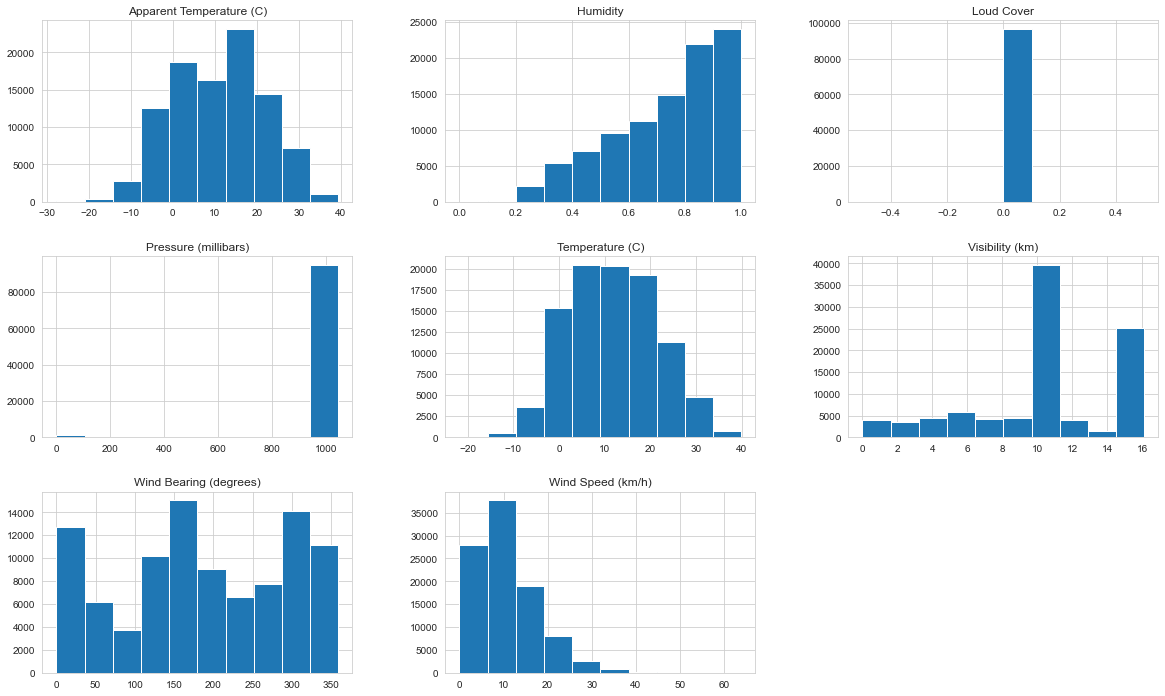

In [126]:
#Distribution of features and their values
df_weather.hist(figsize=(20,12))
plt.show()

**Observations**
* Loud Cover has all values as Zero
* Humidity is negatively skewed i.e. Mean > Mode
* Wind Speed is positively skewed i.e. Mean < Mode
* Pressure is highly negatively skewded


#### Skewness of Data

In [128]:
df_weather.skew()

Temperature (C)             0.094127
Apparent Temperature (C)   -0.057302
Humidity                   -0.715880
Wind Speed (km/h)           1.113493
Wind Bearing (degrees)     -0.154643
Visibility (km)            -0.498712
Loud Cover                  0.000000
Pressure (millibars)       -8.422506
dtype: float64

#### Outlier Analysis

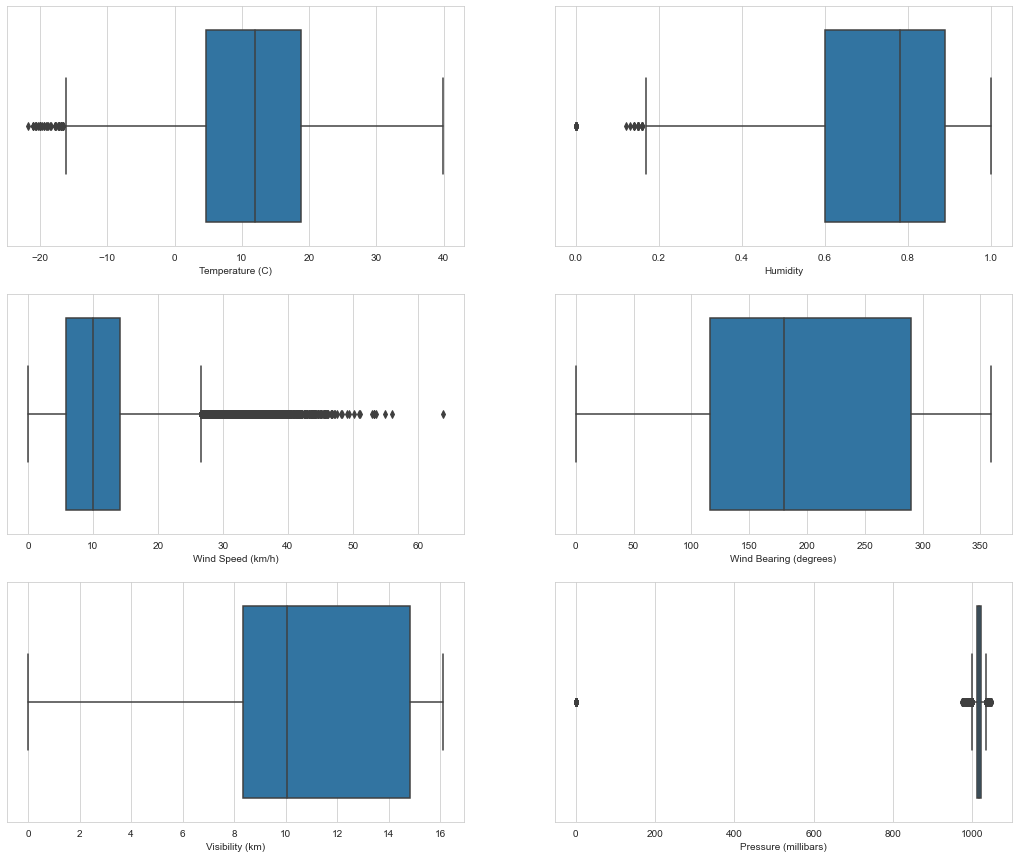

In [129]:
plt.figure(figsize=(18,15))

plt.subplot(3,2,1)
sns.boxplot(df_weather['Temperature (C)'])

plt.subplot(3,2,2)
sns.boxplot(df_weather['Humidity'])

plt.subplot(3,2,3)
sns.boxplot(df_weather['Wind Speed (km/h)'])

plt.subplot(3,2,4)
sns.boxplot(df_weather['Wind Bearing (degrees)'])

plt.subplot(3,2,5)
sns.boxplot(df_weather['Visibility (km)'])

plt.subplot(3,2,6)
sns.boxplot(df_weather['Pressure (millibars)'])


plt.show()

Since from above outlier analysis plots, we see that temperature, wind speed and pressure have more outlier points. Will further analyse the value of these attributes with respect to Humidity.

### Bivariate

##### Corelation between attributes

In [130]:
#Dropping Loud Cover attribute before going forward with analysis
df_weather.drop(labels="Loud Cover", axis=1, inplace=True)

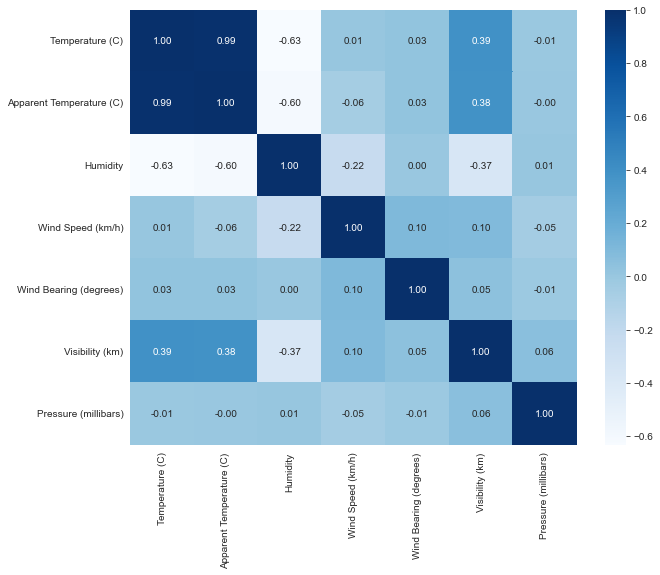

In [131]:
#Finding correlation between attributes
plt.figure(figsize=(10,8))
sns.heatmap(df_weather.corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

* Attributes - Temperture and Apparent Temperature have very high correlation.
  Since, their is a high corelation, we can drop apparent temperature column.
* Humidity has negative correlation with Temperature, Wind Speed and Visibility, implies with increase in these attribute values, Humidity decreases and vice-versa
* Humidity has '0' correlation with Wind Bearing, implies direction of wind is not impacting the humidity values.
* Also, Humidity has almost 0 correlation with attribute Pressure

### Variaiton of Humidity with Temperature, Wind Speed, Visibility

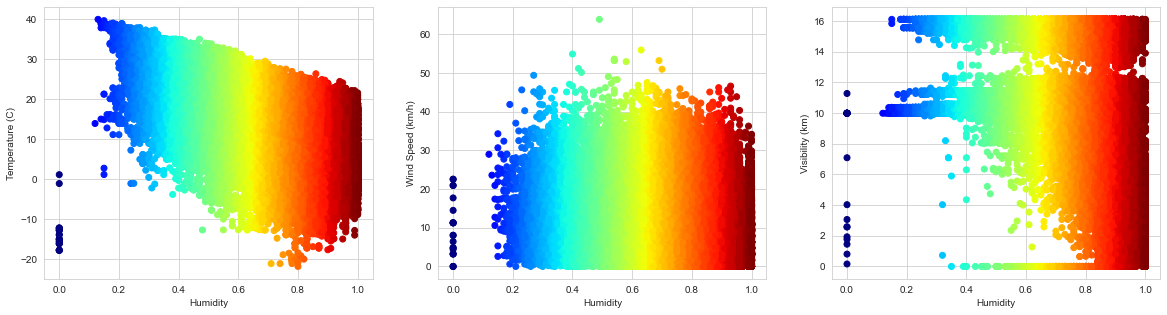

In [132]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
## Comparing Humidity with Temperature attribute
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
plt.scatter(df_weather['Humidity'],
            df_weather['Temperature (C)'],
            c=df_weather['Humidity'],
            cmap="jet"
            ); 

plt.subplot(1,3,2)
## Comparing Humidity with Wind Speed(km/h) attribute
plt.xlabel("Humidity")
plt.ylabel("Wind Speed (km/h)")
plt.scatter(df_weather['Humidity'],
            df_weather['Wind Speed (km/h)'],
            c=df_weather['Humidity'],
            cmap="jet"
            ); 


plt.subplot(1,3,3)
## Comparing Humidity with Visibility (km) attribute
plt.xlabel("Humidity")
plt.ylabel("Visibility (km)")
plt.scatter(df_weather['Humidity'],
            df_weather['Visibility (km)'],
            c=df_weather['Humidity'],
            cmap="jet"
            ); 

plt.show()

In [133]:
df_column = ['Apparent Temperature (C)', 'Humidity']
df_monthly_mean = df_weather[df_column].resample("MS").mean() #MS-Month Starting
df_monthly_mean.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


### Variation of Humditiy and  Temperature with Time

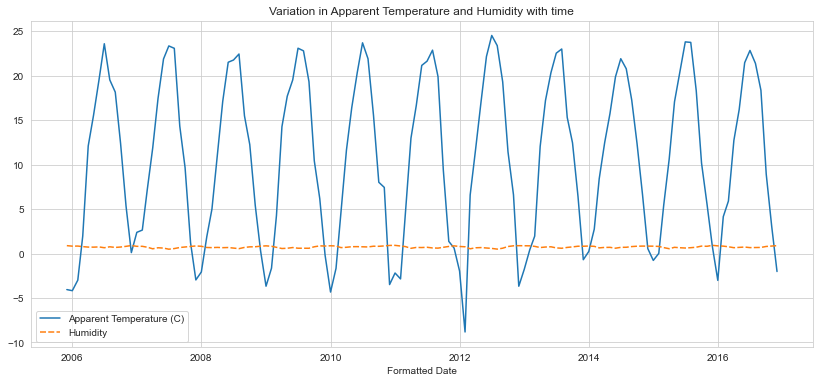

In [134]:
plt.figure(figsize=(14,6))
plt.title("Variation in Apparent Temperature and Humidity with time")
sns.lineplot(data=df_monthly_mean)

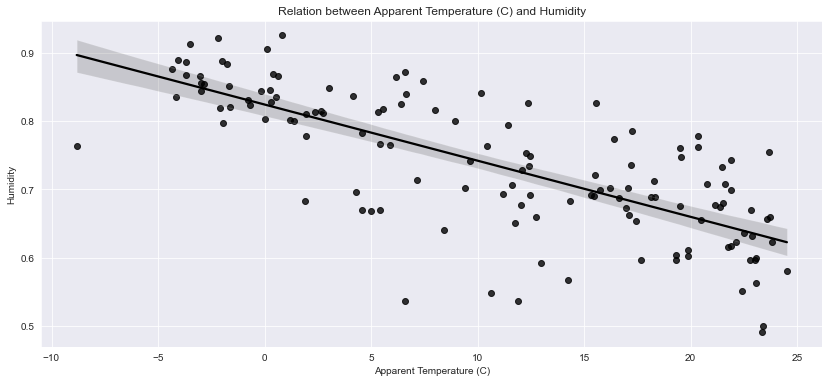

In [135]:
plt.figure(figsize=(14,6))
sns.set_style("darkgrid")
sns.regplot(data=df_monthly_mean, x="Apparent Temperature (C)", y="Humidity", color="black")
plt.title("Relation between Apparent Temperature (C) and Humidity")
plt.show()

It is evident from the above graph that with increase in Temperature, Humdity values have decreased

In [136]:
# Function for plotting Humidity & Apparent Temperature for all month
TEMP_DATA = df_monthly_mean.iloc[:,0]
HUM_DATA = df_monthly_mean.iloc[:,1]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

### Month-wise Plot for Apparent Temperature of 10 years 

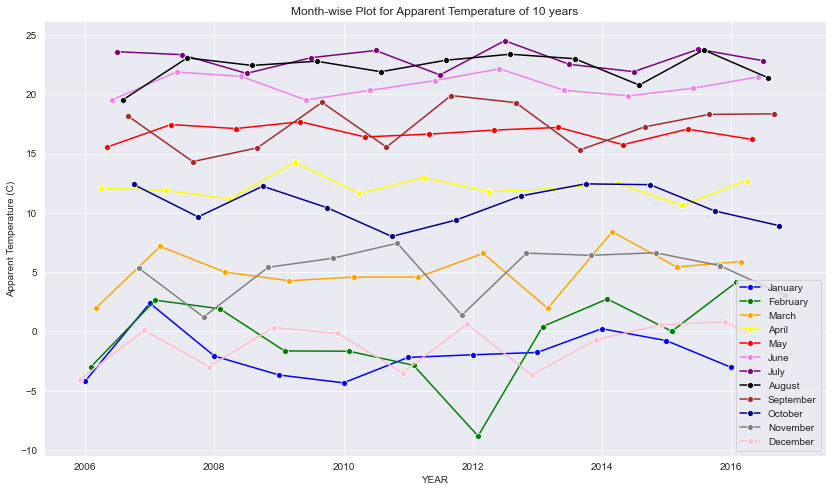

In [137]:
# Month-wise Plot for Apparent Temperature of 10 years 
title = 'Month-wise Plot for Apparent Temperature of 10 years' 
sns_plot(title, TEMP_DATA)

### Variation of Humidity with Time 

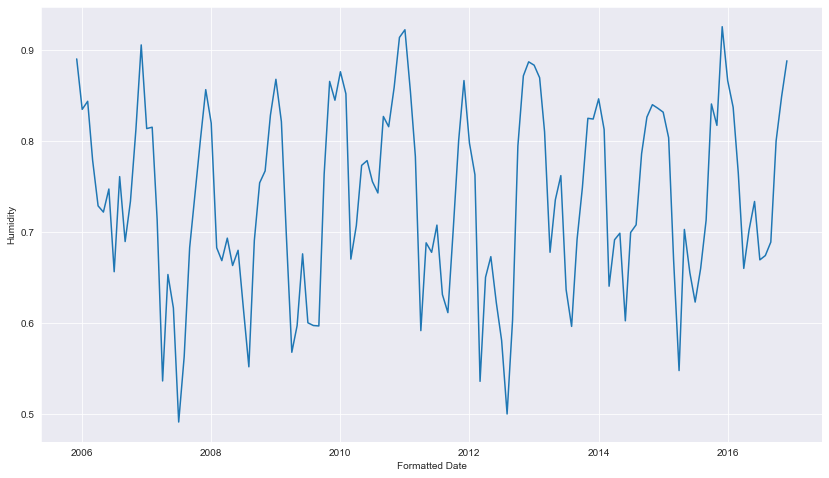

In [138]:
plt.figure(figsize=(14,8))
sns.lineplot(data=df_monthly_mean['Humidity'])

**Observations**
* Value of Humidity is greater than 0.5
* Further variation of humdity on monthly basis is studies below

In [139]:
# Function for plotting Humidity for each month
def sns_month_plot(month):
    plt.figure(figsize=(14,4))
    label = label_color(month)[0]
    plt.title('Humidity for {}'.format(label))
    plt.xlabel('YEAR')
    data = df_monthly_mean[df_monthly_mean.index.month == month]
    sns.lineplot(data=data['Humidity'], marker='o')
    print('-'*110)
    plt.show()

--------------------------------------------------------------------------------------------------------------


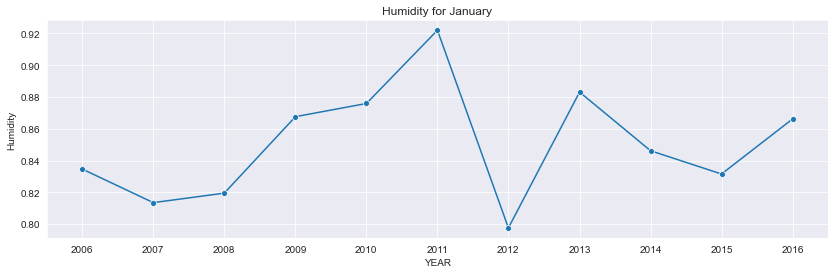

--------------------------------------------------------------------------------------------------------------


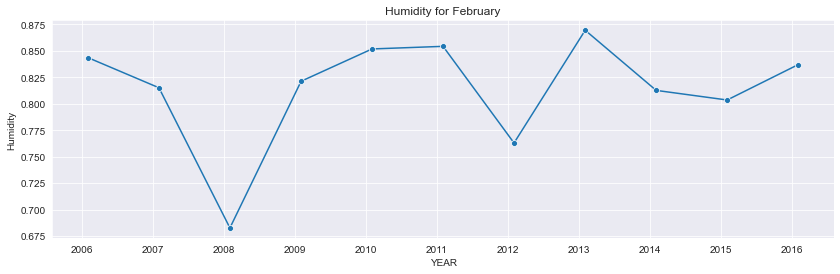

--------------------------------------------------------------------------------------------------------------


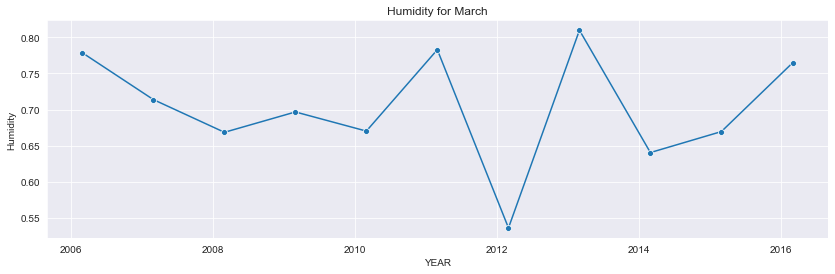

--------------------------------------------------------------------------------------------------------------


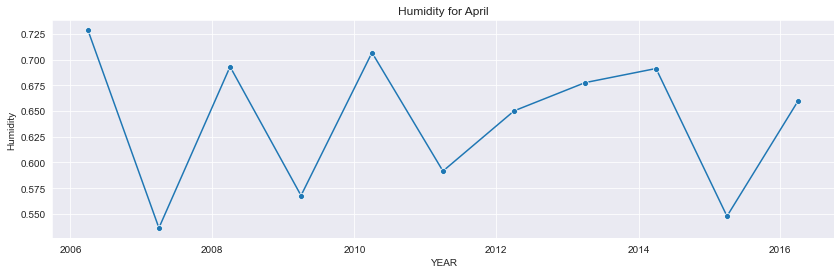

--------------------------------------------------------------------------------------------------------------


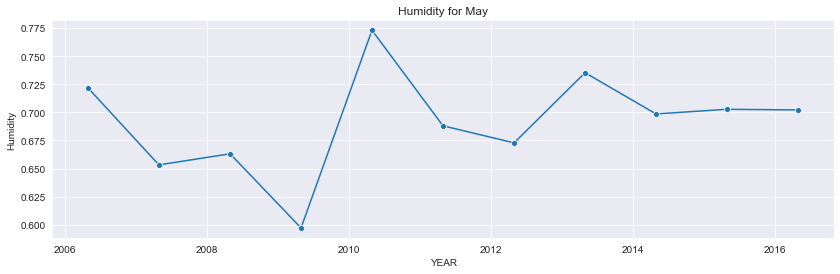

--------------------------------------------------------------------------------------------------------------


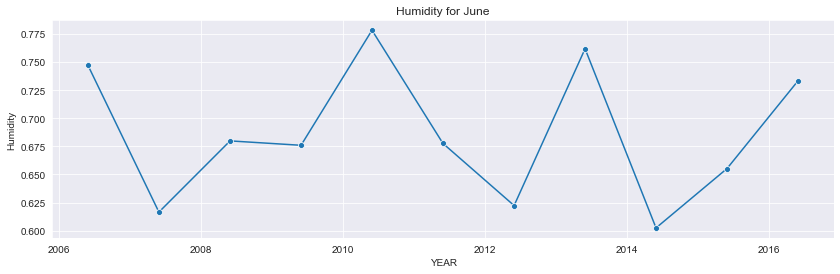

--------------------------------------------------------------------------------------------------------------


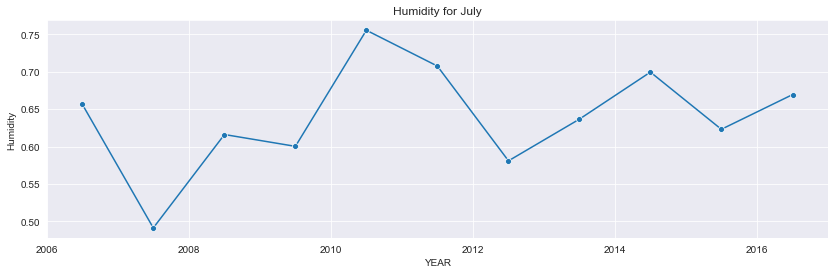

--------------------------------------------------------------------------------------------------------------


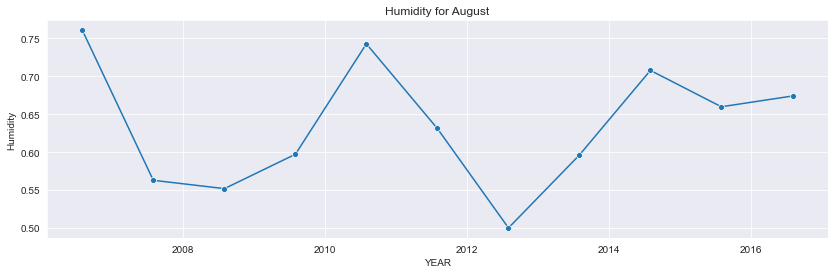

--------------------------------------------------------------------------------------------------------------


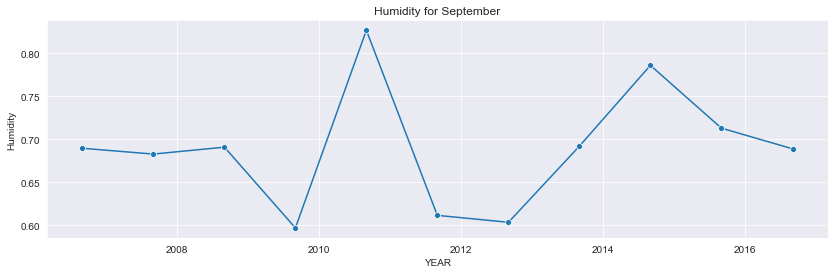

--------------------------------------------------------------------------------------------------------------


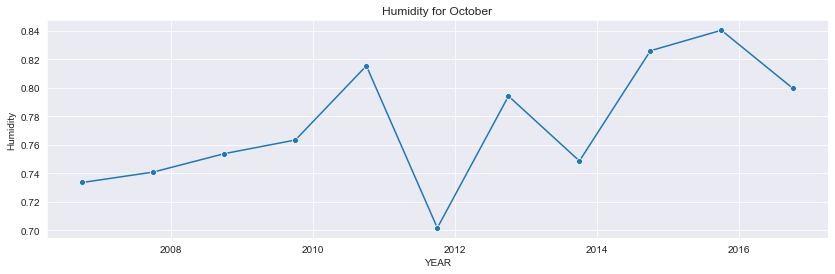

--------------------------------------------------------------------------------------------------------------


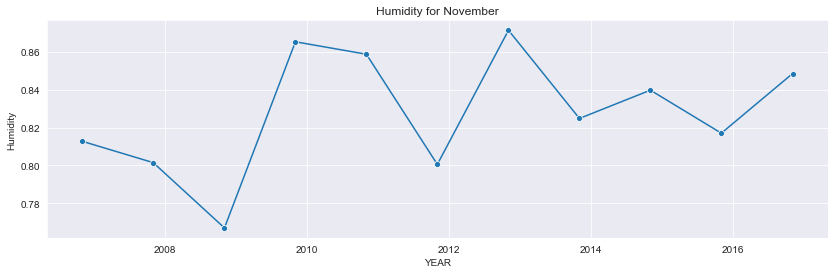

--------------------------------------------------------------------------------------------------------------


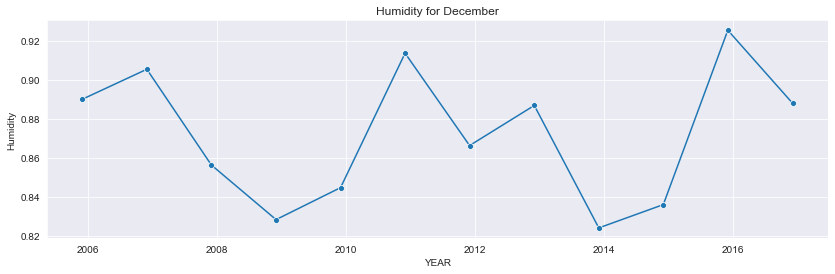

In [140]:
# plot for the month of JANUARY - DECEMBER
for month in range(1,13):
    sns_month_plot(month)

**Observations**

* With increase in Temperature, Humidity values have gradually decreased, as seen from above graphs.

## 4. Data Preprocessing

### 4.1 Handling Missing Values

In [141]:
total_rows=df_weather.shape[0]
print(total_rows)
df_weather["Precip Type"].isnull().sum()

96453


517

In [142]:
(df_weather["Precip Type"].isnull().sum()/total_rows)*100

0.5360123583506993

##### 4.1.1 Dropping null rows of "Precip Type"
Precip Type attribute has 0.53% missing values 

In [143]:
# making new data frame with dropped NA values 
new_data = df_weather.dropna(axis = 0, how ='any') 

In [144]:
print("Old data frame length:", len(df_weather))
print("New data frame length:", len(new_data)) 
print("Number of rows with at least 1 NA value: ",
      (len(df_weather)-len(new_data)))

Old data frame length: 96453
New data frame length: 95936
Number of rows with at least 1 NA value:  517


In [145]:
df_weather=new_data
df_weather["Precip Type"].isnull().sum()

0

### 4.2 Feature Selection

##### 4.2.1 Dropping Loud Cover
Loud Cover has all values as 0

In [ ]:
#Dropping Loud Cover attribute before going forward with analysis
#df_weather.drop(labels="Loud Cover", axis=1, inplace=True)

##### 4.2.2 Dropping Temperature

Temperature is being dropped as Temperature and Apparent Temperature is highly correlated

In [146]:
#Dropping Loud Cover attribute before going forward with analysis
df_weather.drop(labels="Temperature (C)", axis=1, inplace=True)

##### 4.2.3 Dropping Daily Summary

Daily Summary is being dropped as Summary and Daily Summary is highly correlated

In [149]:
#Dropping Loud Cover attribute before going forward with analysis
df_weather.drop(labels="Daily Summary", axis=1, inplace=True)

### 4.3 Encoding Categorical Data

In [151]:
le = LabelEncoder()

for i in df_weather.columns:
    if df_weather[i].dtypes == 'object':
        df_weather[i] = le.fit_transform(df_weather[i])

df_weather.head()

,Summary,Precip Type,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Formatted Date,,,,,,,,
2006-03-31 22:00:00+00:00,19,0,7.388889,0.89,14.1197,251.0,15.8263,1015.13
2006-03-31 23:00:00+00:00,19,0,7.227778,0.86,14.2646,259.0,15.8263,1015.63
2006-04-01 00:00:00+00:00,17,0,9.377778,0.89,3.9284,204.0,14.9569,1015.94
2006-04-01 01:00:00+00:00,19,0,5.944444,0.83,14.1036,269.0,15.8263,1016.41
2006-04-01 02:00:00+00:00,17,0,6.977778,0.83,11.0446,259.0,15.8263,1016.51


Finding the corelation after data processing

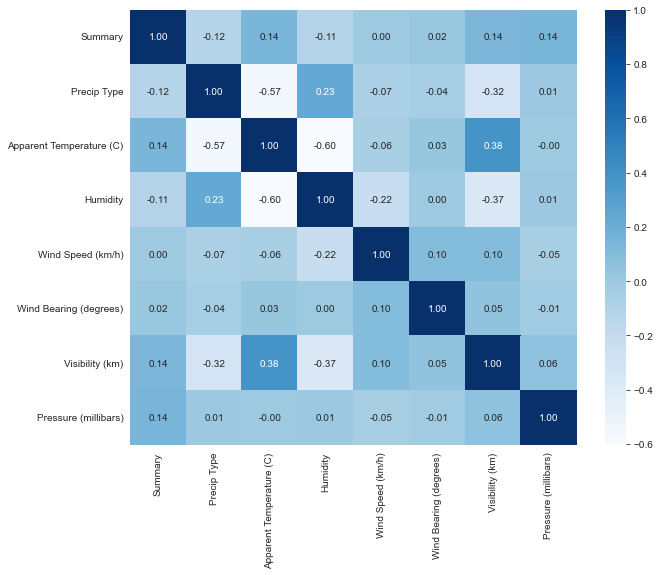

In [159]:
#Finding correlation between attributes
plt.figure(figsize=(10,8))
sns.heatmap(df_weather.corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

### 4.4 Scaling Dataset Attributes

‘StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance’

In [153]:
sc=StandardScaler()
X = df_weather.drop('Humidity', axis=1)
Y = df_weather['Humidity']

In [157]:
dataset = sc.fit_transform(X)

In [158]:
df_weather_scaled = pd.DataFrame(dataset,columns=X.columns)
df_weather_scaled.head()

,Summary,Precip Type,Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.685536,-0.354531,-0.324102,0.478964,0.591157,1.309107,0.102152
1,0.685536,-0.354531,-0.339134,0.499902,0.665655,1.309107,0.106415
2,0.226376,-0.354531,-0.138532,-0.993620,0.153478,1.100806,0.109058
3,0.685536,-0.354531,-0.458873,0.476638,0.758778,1.309107,0.113066
4,0.226376,-0.354531,-0.362460,0.034630,0.665655,1.309107,0.113919


# Model Building

We now proceed to the main step of our machine learning, fitting the model and predicting the outputs. We fit the data into multiple regression models to compare the performance of all models and select the best model.

In [163]:
# Create objects for our data models

dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()
lr = LinearRegression()

In [165]:
# Split the data into test and train

x_train, x_test, y_train, y_test = train_test_split(df_weather_scaled, Y, test_size=0.3, random_state=42)

In [167]:
# Fitting the model for all modelling techniques

for i in [dt, svr, knn, lr]:
    i.fit(x_train,y_train)
    pred = i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.1:
        print(i)
        print("R2 Score for Test Data is : ", test_score)
        print("R2 Score for Train Data is : ", train_score)
        print("Mean absolute error is : ", mean_absolute_error(y_test, pred))
        print("Mean squared error is : ", mean_squared_error(y_test, pred))
        print("Root mean squared error is : ", (mean_squared_error(y_test, pred, squared=False)))
        print("-------------------------------")
        

SVR()
R2 Score for Test Data is :  0.6575469642969453
R2 Score for Train Data is :  0.664707461741837
Mean absolute error is :  0.08711071207530044
Mean squared error is :  0.01308766372148119
Root mean squared error is :  0.11440132744632464
-------------------------------
LinearRegression()
R2 Score for Test Data is :  0.48154479978750675
R2 Score for Train Data is :  0.477906496657578
Mean absolute error is :  0.11097986239811508
Mean squared error is :  0.019814008367903594
Root mean squared error is :  0.14076224056153552
-------------------------------


We achieve the best score using Support Vector Regression, with an r2 score of 65%. We also obtain the minimum values for mean_absolute_error, mean_squared_error and root_mean_squared_error (regression metrics) with this model.

#### We try to use ensemble models to check if our performance improves using ensemble models -

In [168]:
# importing libraries

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [169]:
rfr = RandomForestRegressor()
ad = AdaBoostRegressor()
gd = GradientBoostingRegressor()

In [170]:
# Split the data into test and train

x_train, x_test, y_train, y_test = train_test_split(df_weather_scaled, Y, test_size=0.3, random_state=100)

In [171]:
for i in [rfr, ad, gd]:
    i.fit(x_train, y_train)
    pred=i.predict(x_test)
    test_score = r2_score(y_test,pred)
    train_score = r2_score(y_train,i.predict(x_train))
    if abs(train_score - test_score) <= 0.2:
        print(i)
        print("R2 Score for Test Data is : ", test_score)
        print("R2 Score for Train Data is : ", train_score)
        print("Mean absolute error is : ", mean_absolute_error(y_test, pred))
        print("Mean squared error is : ", mean_squared_error(y_test, pred))
        print("Root mean squared error is : ", (mean_squared_error(y_test, pred, squared=False)))
        print("-------------------------------")
        

AdaBoostRegressor()
R2 Score for Test Data is :  0.39452269463227285
R2 Score for Train Data is :  0.3949409259341041
Mean absolute error is :  0.13214971456644814
Mean squared error is :  0.023443212803685186
Root mean squared error is :  0.1531117657258422
-------------------------------
GradientBoostingRegressor()
R2 Score for Test Data is :  0.6959351583119076
R2 Score for Train Data is :  0.7029225845534262
Mean absolute error is :  0.08227264776084728
Mean squared error is :  0.011772954537880763
Root mean squared error is :  0.10850324666976911
-------------------------------


Gradient Boosting model gives us the best accuracy, with an R2 score of 69% on test data, and 70% on train data.
This is also better than the Support Vector Regression.

## 6. Cross Validation

Performing Cross Validation to our model to check if the model has any overfitting issue, by checking the ability of the model to make predictions on new data, using k-folds. Cross Validation is tested for AdaBoost Regressor and Gradient Boosting Regressor.

In [172]:
from sklearn.model_selection import cross_val_score

In [175]:
for i in range(2,9):
    cv = cross_val_score(ad, df_weather_scaled, Y, cv=i)
    print(ad, cv.mean())

AdaBoostRegressor() 0.43390930074811956
AdaBoostRegressor() 0.43072425035746437
AdaBoostRegressor() 0.4308600689254324
AdaBoostRegressor() 0.44373382803334743
AdaBoostRegressor() 0.4306638687149204
AdaBoostRegressor() 0.39517164366472096
AdaBoostRegressor() 0.4190571947821795


In [176]:
for i in range(2,9):
    cv = cross_val_score(gd, df_weather_scaled, Y, cv=i)
    print(gd, cv.mean())

GradientBoostingRegressor() 0.6632852383204288
GradientBoostingRegressor() 0.6662364040353793
GradientBoostingRegressor() 0.6742129867986931
GradientBoostingRegressor() 0.6781878816162313
GradientBoostingRegressor() 0.6711988371340918
GradientBoostingRegressor() 0.6747087178330512
GradientBoostingRegressor() 0.6711328590024142


The Ada Boost Regressor provides us a cross validation score of 41%, and Gradient Boosting Regressor gives a score of 67%.

# Conclusion

We trained the dataset on various regression models, and we are successfully able to train our regression model using 'Gradient Boosting Regressor’ to predict the humidity with an r2_score of 67%, and have achieved the required task successfully with following results:

GradientBoostingRegressor()
R2 Score for Test Data is :  0.6959351583119076
R2 Score for Train Data is :  0.7029225845534262
Mean absolute error is :  0.08227264776084728
Mean squared error is :  0.011772954537880763
Root mean squared error is :  0.10850324666976911

## Team Members
1. Ayushi Gupta -        **(2020FC04088)**
2. Kirti Kedia -       **(2020FC04449)**
3. Rutika Banode -   **(2020FC04438)**